In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt
import numpy as np

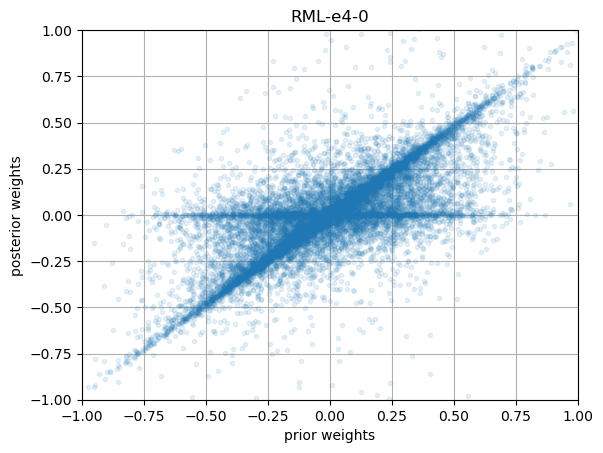

In [30]:
num = 0
e = 4




#for i in range([1, 2]):
prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]
prior_weights *= -1

model = Net_mask()
#model.load_state_dict(torch.load(f'../data/@/weight_init/rml_e{e}_{num}.pth'))
#init_weights = torch.cat([param.view(-1) for param in model.parameters()])
#model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e4/{num}/model_weights.pth'))
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])


plt.plot(prior_weights.detach(), posterior_weights.detach(), '.', alpha=0.1)
plt.axis([x_min, x_max, x_min, x_max])
#plt.title('RML-e4-0')
plt.title('RML-e4-0')
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.grid()
plt.savefig('../figures/plot_weights_posterior_vs_prior/RML_e4_0_plain.png')
#plt.savefig('../figures/plot_weights_posterior_vs_prior/RML_e5_0_plain.png')

In [24]:
x_min = -1
x_max = 1
lim1 = 0.15
lim2 = 0.05
#lim2 = lim1
x = np.linspace(x_min, x_max, 1000)
x2_p1 = np.linspace(x_min, lim2-lim1, 1000)
x2_p2 = np.linspace(lim2+lim1, x_max, 1000)
x2_p3 = np.linspace(x_min, -lim1 - lim2, 1000)
x2_p4 = np.linspace(-lim2 + lim1, x_max, 1000)
y2_p1 = x2_p1*0+lim2
y2_p2 = x2_p2*0+lim2
y2_p3 = x2_p3*0 -lim2
y2_p4 = x2_p4*0 -lim2
a1_up = lim1 + x
a1_down = -lim1 + x
a2_up = lim2 + 0*x
a2_down = -lim2 + 0*x

p_x = [lim2 - lim1, lim2 + lim1, -lim2 - lim1, -lim2 + lim1]
p_y = [lim2, lim2, -lim2, -lim2]

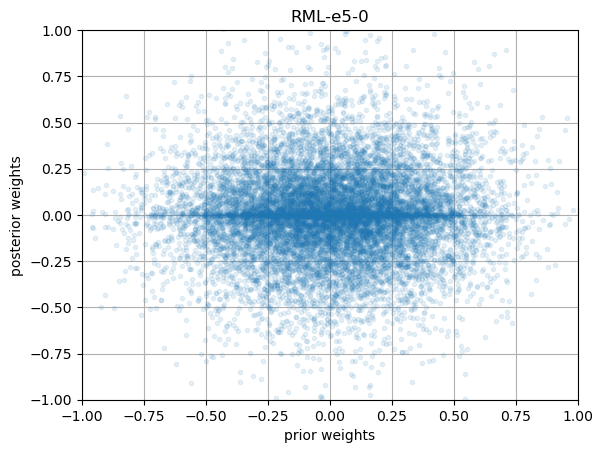

In [25]:
plt.plot(prior_weights.detach(), posterior_weights.detach(), '.', alpha=0.1)
plt.axis([x_min, x_max, x_min, x_max])
#plt.title('RML-e4-0')
plt.title('RML-e5-0')
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.grid()
#plt.savefig('../figures/plot_weights_posterior_vs_prior/RML_e4_0_plain.png')
#plt.savefig('../figures/plot_weights_posterior_vs_prior/RML_e5_0_plain.png')

Text(0.5, 1.0, '4 areas of interest')

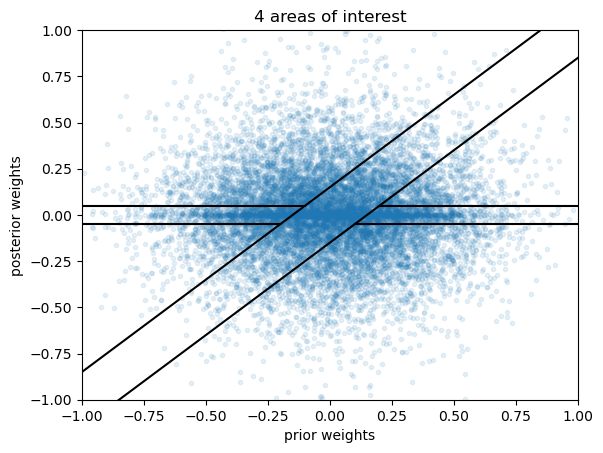

In [26]:
plt.plot(prior_weights.detach(), posterior_weights.detach(), '.', alpha=0.1)
plt.plot(x, a1_up, 'k')
plt.plot(x, a1_down, 'k')
plt.plot(x2_p1, y2_p1, 'k')
plt.plot(x2_p2, y2_p2, 'k')
plt.plot(x2_p3, y2_p3, 'k')
plt.plot(x2_p4, y2_p4, 'k')
#plt.plot(x, a2_up, 'r')
#plt.plot(x, a2_down, 'r')
#plt.plot(p_x, p_y, 'bo')
#plt.plot([-1, 1], [-1, 1], alpha=0.1)

x_point = 0.3
a1_min = x_point - lim1
a1_max = x_point + lim1
a2_min = -lim2
a2_max = lim2
x_point_neg = -0.3
a1_min_neg = x_point_neg - lim1
a1_max_neg = x_point_neg + lim1
a2_min_neg = -lim2
a2_max_neg = lim2
#plt.plot([x_point, x_point, x_point, x_point], [a1_min, a1_max, a2_min, a2_max], 'bo')
#plt.plot([x_point_neg, x_point_neg, x_point_neg, x_point_neg], [a1_min_neg, a1_max_neg, a2_min_neg, a2_max_neg], 'bo')

#plt.plot(x, x*0, 'r')
#plt.plot(0*x, x, 'r')
plt.axis([x_min, x_max, x_min, x_max])
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.title('4 areas of interest')
#plt.savefig(f'../figures/plot_weights_posterior_vs_prior/4_areas.png')

In [27]:
#prior_weights = prior_weights 
a1_min_tens = prior_weights - lim1
a1_max_tens = prior_weights + lim1
a2_min_tens = prior_weights*0 - lim2
a2_max_tens = prior_weights*0 + lim2

In [28]:
#plt.plot(prior_weights, a1_min_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a1_max_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a2_min_tens, '.', alpha=0.1)
#plt.plot(prior_weights, a2_max_tens, '.', alpha=0.1)

(-1.0, 1.0, -1.0, 1.0)

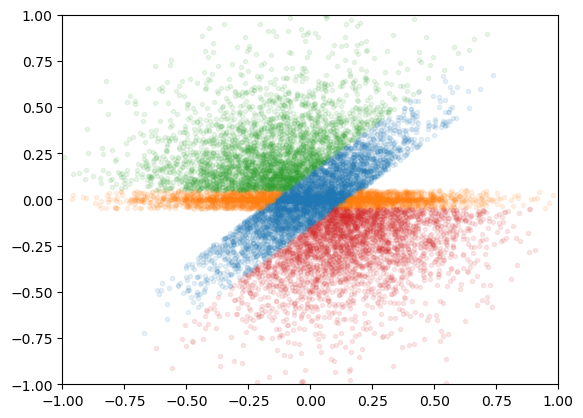

In [29]:
a1_mask = torch.logical_and(posterior_weights >= a1_min_tens, posterior_weights <= a1_max_tens)
a2_mask = torch.logical_and(torch.logical_not(a1_mask), torch.logical_and(posterior_weights >= a2_min_tens, posterior_weights <= a2_max_tens))
a3_mask = torch.logical_and(posterior_weights > a1_max_tens, posterior_weights > a2_max_tens)
a4_mask = torch.logical_and(posterior_weights < a1_min_tens, posterior_weights < a2_min_tens)
a1_prior = torch.masked_select(prior_weights, a1_mask)
a2_prior = torch.masked_select(prior_weights, a2_mask)
a3_prior = torch.masked_select(prior_weights, a3_mask)
a4_prior = torch.masked_select(prior_weights, a4_mask)
a1_posterior = torch.masked_select(posterior_weights, a1_mask)
a2_posterior = torch.masked_select(posterior_weights, a2_mask)
a3_posterior = torch.masked_select(posterior_weights, a3_mask)
a4_posterior = torch.masked_select(posterior_weights, a4_mask)
plt.plot(a1_prior.detach(), a1_posterior.detach(), '.', alpha=0.1)
plt.plot(a2_prior.detach(), a2_posterior.detach(), '.', alpha=0.1)
plt.plot(a3_prior.detach(), a3_posterior.detach(), '.', alpha=0.1)
plt.plot(a4_prior.detach(), a4_posterior.detach(), '.', alpha=0.1)

#plt.plot(x, a1_up, 'k')
#plt.plot(x, a1_down, 'k')
#plt.plot(x2_p1, y2_p1, 'k')
#plt.plot(x2_p2, y2_p2, 'k')
#plt.plot(x2_p3, y2_p3, 'k')
#plt.plot(x2_p4, y2_p4, 'k')

plt.axis([x_min, x_max, x_min, x_max])
#plt.title('4 areas of interest')
#plt.savefig('../figures/plot_weights_posterior_vs_prior/4_areas_colored_lines.png')